## Reading Data

In [52]:
from google.colab import files
uploaded = files.upload()
print(uploaded.keys())

Saving hotel_bookings.csv to hotel_bookings (1).csv
dict_keys(['hotel_bookings (1).csv'])


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
print("imports have done")


imports have done


In [54]:
data = pd.read_csv('hotel_bookings.csv')
data.sample(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
73244,City Hotel,1,104,2017,August,33,17,0,3,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,D,D,2,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Canceled,2017-05-19
3698,Resort Hotel,0,165,2015,December,53,30,0,4,2,0.0,0,Undefined,PRT,Groups,TA/TO,0,0,0,A,D,0,No Deposit,308.0,NaN,122,Transient-Party,136.50,0,0,Check-Out,2016-01-03
44498,City Hotel,1,33,2015,October,41,6,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Contract,89.78,0,1,Canceled,2015-09-03
7836,Resort Hotel,1,25,2016,August,36,29,1,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,189.00,0,2,Canceled,2016-08-05
54083,City Hotel,1,245,2016,July,28,6,2,4,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,19.0,NaN,0,Transient,110.00,0,0,Canceled,2016-02-23
60779,City Hotel,1,17,2016,November,48,20,6,14,1,0.0,0,BB,AGO,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,9.0,NaN,0,Transient,97.20,0,0,Canceled,2016-11-04
8246,Resort Hotel,0,243,2016,September,39,19,2,5,2,0.0,0,BB,POL,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,315.0,NaN,0,Transient,51.85,0,0,Check-Out,2016-09-26
54324,City Hotel,1,106,2016,July,29,12,2,6,2,0.0,0,SC,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,94.50,0,0,Canceled,2016-07-03
115245,City Hotel,0,462,2017,July,26,1,2,1,2,0.0,0,BB,GBR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,2,Check-Out,2017-07-04
90847,City Hotel,0,58,2016,June,24,10,1,2,3,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,4,No Deposit,9.0,NaN,0,Transient,159.30,0,2,Check-Out,2016-06-13


## EDA

### Data Description




hotel → Type of hotel (City Hotel / Resort Hotel).

is_canceled → 1 if the booking was canceled, 0 otherwise.


lead_time → Days between booking date and arrival date.

arrival_date_year / month / week_number / day_of_month → When the guest planned to arrive.

stays_in_weekend_nights / stays_in_week_nights → Number of nights stayed.

adults, children, babies → Number of guests.

meal → Type of meal booked (BB = Bed & Breakfast, FB = Full Board, etc.).

country → Country of origin of the guest.

market_segment / distribution_channel → How the booking was made (e.g., Online Travel Agency).

is_repeated_guest → Whether the guest has booked before.

previous_cancellations → Number of past canceled bookings by the guest.

reserved_room_type / assigned_room_type → What they booked vs. what they got.

deposit_type → No deposit / Non-refundable / Refundable.

agent, company → Booking agent or company IDs.

days_in_waiting_list → Days booking stayed on the waiting list.

customer_type → Type of customer (Transient, Group, etc.).

adr → Average Daily Rate (price paid per night per room).

required_car_parking_spaces → How many parking spaces requested.

total_of_special_requests → Extra requests by the guest.

reservation_status / reservation_status_date → Final state (Canceled, No-Show, Checked-Out) and the date of that status.





In [55]:
data.shape

(119390, 32)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
data.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [58]:
data.duplicated().sum()

np.int64(31994)

In [59]:
data.loc[data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


### Satistical Analysis

In [60]:
percent_missing = data.isnull().sum() * 100 / len(data)

missing_value_df = pd.DataFrame({
    'missing_count': data.isnull().sum(),
    'percent_missing': percent_missing
})

missing_value_df = missing_value_df.sort_values('percent_missing', ascending=False)

print(missing_value_df)


                                missing_count  percent_missing
company                                112593        94.306893
agent                                   16340        13.686238
country                                   488         0.408744
children                                    4         0.003350
arrival_date_month                          0         0.000000
arrival_date_week_number                    0         0.000000
hotel                                       0         0.000000
is_canceled                                 0         0.000000
stays_in_weekend_nights                     0         0.000000
arrival_date_day_of_month                   0         0.000000
adults                                      0         0.000000
stays_in_week_nights                        0         0.000000
babies                                      0         0.000000
meal                                        0         0.000000
lead_time                                   0         0

In [61]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [62]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [63]:
data['agent'].value_counts()

,count
agent,
9.0,31961
240.0,13922
1.0,7191
14.0,3640
7.0,3539
...,...
197.0,1
294.0,1
388.0,1


In [64]:
status_counts = data['meal'].value_counts()

status_percent = (status_counts / len(data)) * 100

status_summary = pd.DataFrame({
    'count': status_counts,
    'percent': status_percent.round(2)
})

print(status_summary )



           count  percent
meal                     
BB         92310    77.32
HB         14463    12.11
SC         10650     8.92
Undefined   1169     0.98
FB           798     0.67


In [65]:
status_counts = data['hotel'].value_counts()

status_percent = (status_counts / len(data)) * 100

status_summary = pd.DataFrame({
    'count': status_counts,
    'percent': status_percent.round(2)
})

print(status_summary )

              count  percent
hotel                       
City Hotel    79330    66.45
Resort Hotel  40060    33.55


In [66]:
status_counts = data['reservation_status'].value_counts()

status_percent = (status_counts / len(data)) * 100

status_summary = pd.DataFrame({
    'count': status_counts,
    'percent': status_percent.round(2)
})

print(status_summary)

                    count  percent
reservation_status                
Check-Out           75166    62.96
Canceled            43017    36.03
No-Show              1207     1.01


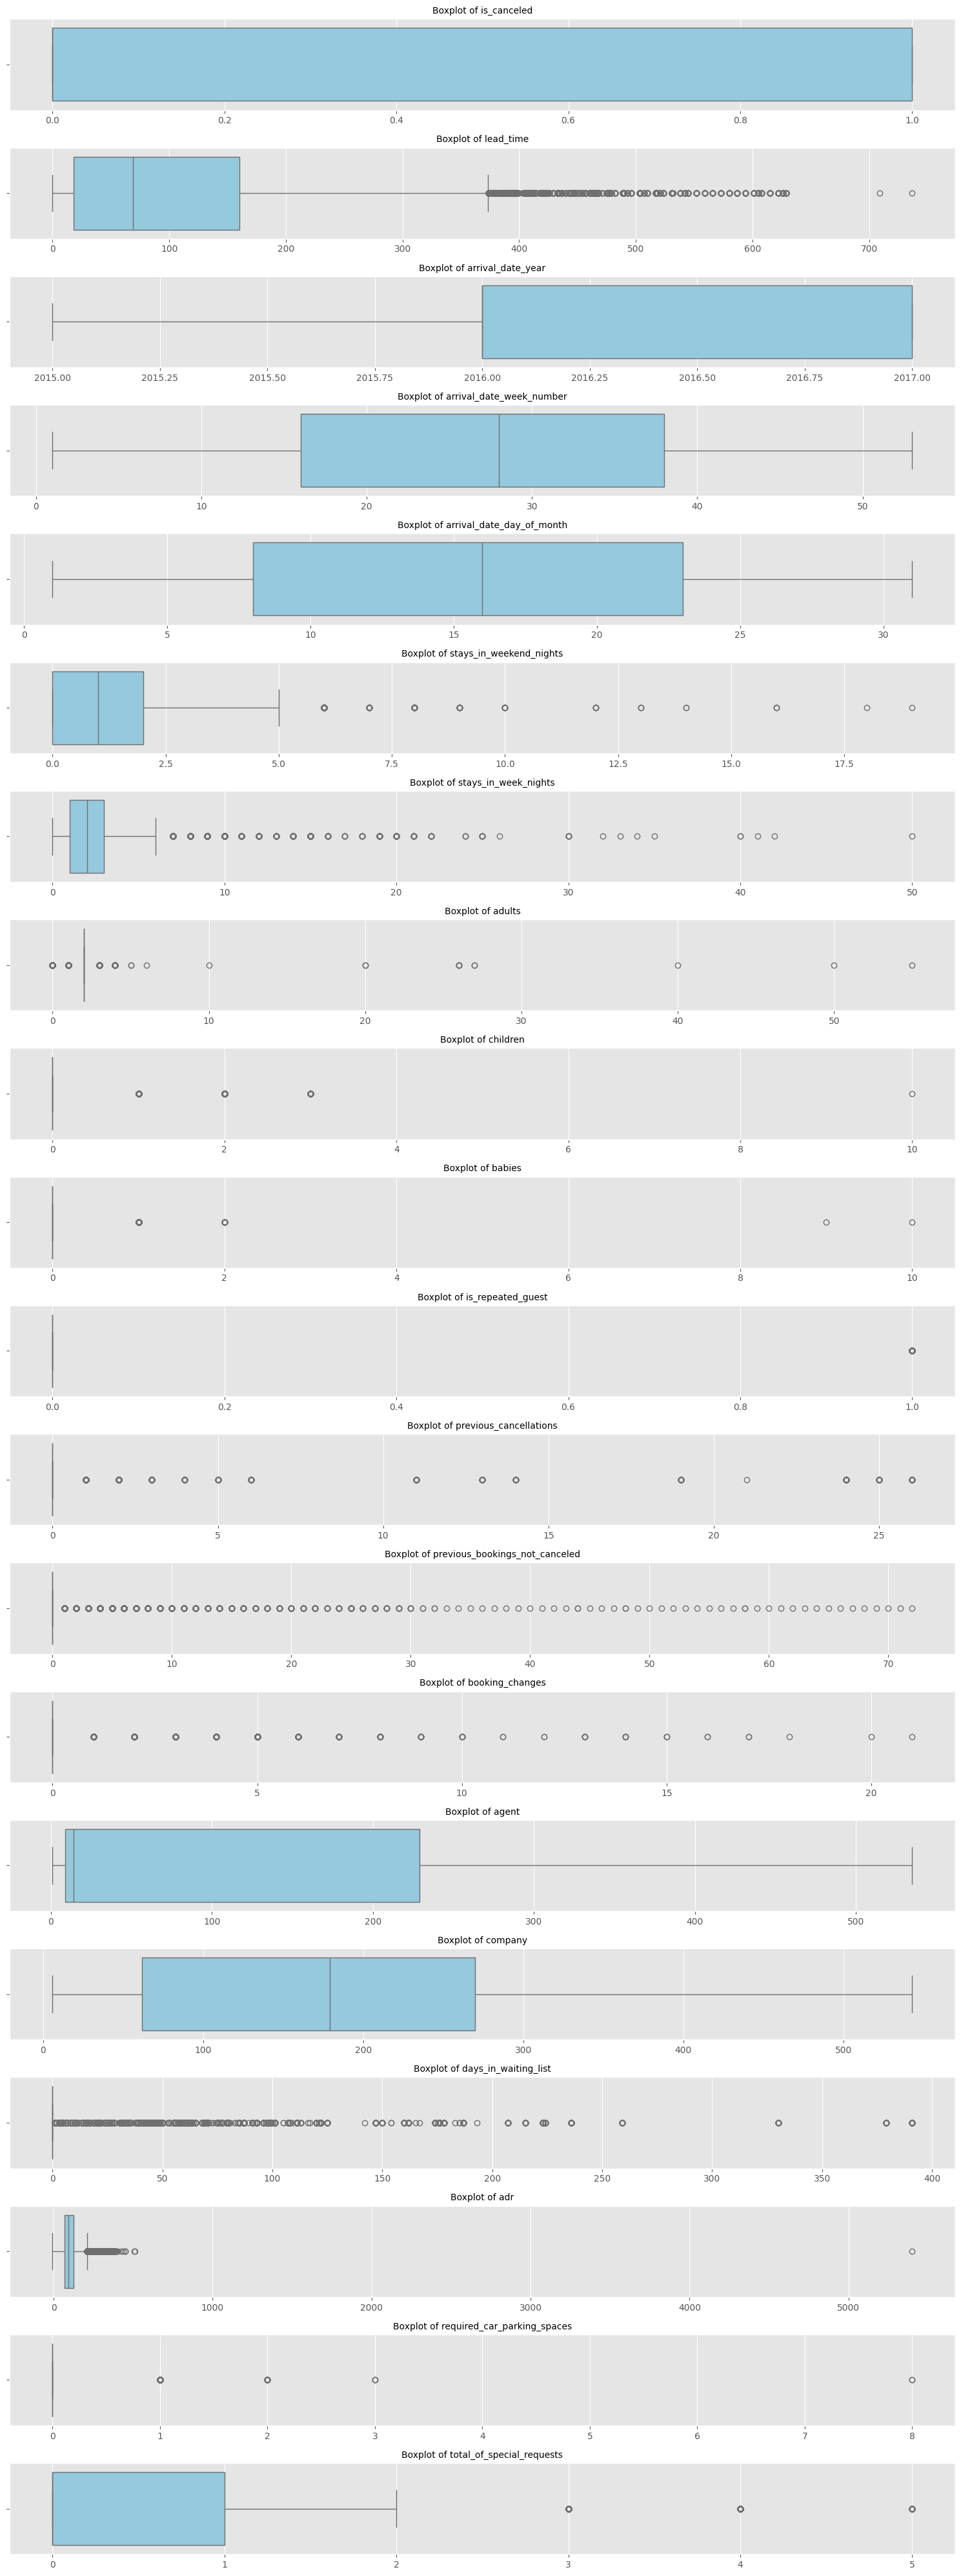

In [67]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, len(numeric_cols)*2))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(f"Boxplot of {col}", fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

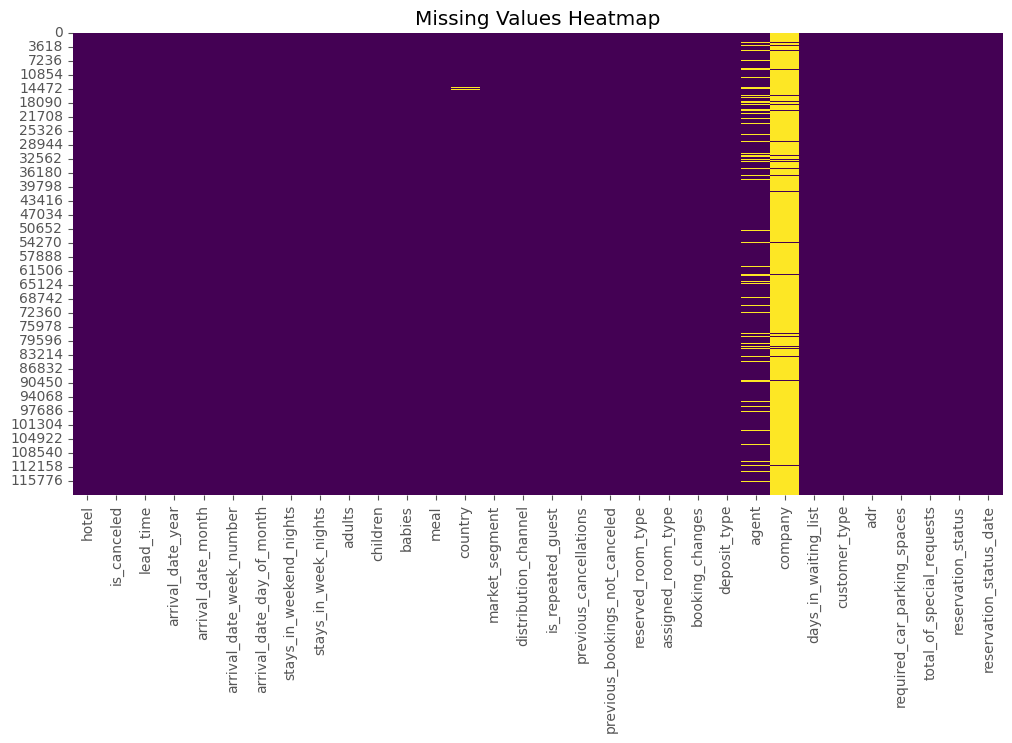

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [69]:
from scipy import stats

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data.loc[data[column].dropna().index[z_scores > threshold], column]
    return outliers

# Example in columns
outliers_lead = detect_outliers_zscore(data, "lead_time")
print(f"Number of outliers in lead_time: {len(outliers_lead)}")

outliers_lead = detect_outliers_zscore(data, "previous_cancellations")
print(f"Number of outliers in previous_cancellations: {len(outliers_lead)}")

outliers_lead = detect_outliers_zscore(data, "adr")
print(f"Number of outliers in adr: {len(outliers_lead)}")

outliers_lead = detect_outliers_zscore(data, "total_of_special_requests")
print(f"Number of outliers in total_of_special_requests: {len(outliers_lead)}")

outliers_lead = detect_outliers_zscore(data, "days_in_waiting_list")
print(f"Number of outliers in days_in_waiting_list: {len(outliers_lead)}")


Number of outliers in lead_time: 1454
Number of outliers in previous_cancellations: 317
Number of outliers in adr: 1138
Number of outliers in total_of_special_requests: 2877
Number of outliers in days_in_waiting_list: 1871


### Report EDA Phase



*   The 'company' column is almost entirely empty (94.3% missing).We need to decide how to handle these.

*   The agent column has many missing values (13.7% missing). We need to decide how to handle these.
*   The country column has a very small amount of data missing (0.4%).


*   The children column has only 4 missing values ( might be negligible).


*   Duplicate Data: A significant problem exists. There are 31,994 duplicate rows in the data. These need to be removed.

*   Data Types: The data is a mix of numbers (int64, float64) and text (object). The reservation_status_date is stored as text but should be converted to a proper date format.

*   Booking Statistics:

    Cancellation Rate: About 37% of all bookings were canceled (is_canceled = 1).

    Hotel Type: 66% of the bookings are for City Hotels, and 34% are for Resort Hotels.

    Meal Type: The vast majority of bookings (77%) are for Bed & Breakfast (BB).

    Booking Status: Most bookings (63%) were checked out, while 36% were canceled, and a small number (1%) were no-shows.


*   Potential Outliers





## Cleaning Phase

In [70]:
data = data.drop_duplicates()

In [71]:
data = data.drop('company', axis=1)

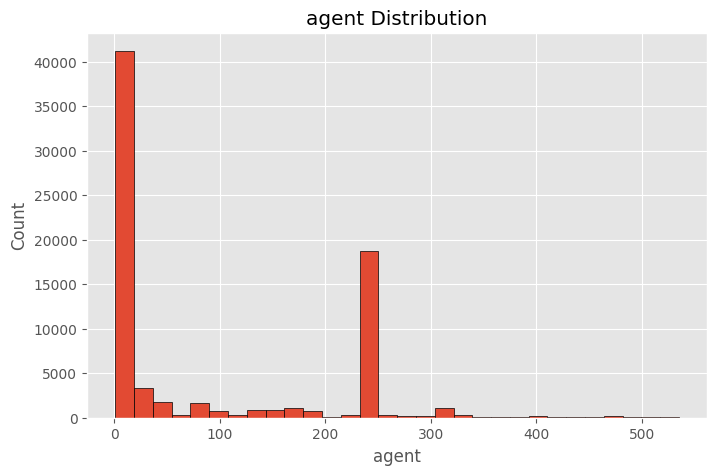

In [72]:
# vis the 'agent' col for choose the right method to fill it with

plt.figure(figsize=(8,5))
plt.hist(data['agent'], bins=30, edgecolor='black')
plt.xlabel('agent')
plt.ylabel('Count')
plt.title('agent Distribution')
plt.show()

In [73]:
# Agent column  we'll replace NaN with 0 (no agent)
data['agent'].fillna(0, inplace=True)

# Country column  we'll fill with the mode
most_frequent_country = data['country'].mode()[0]
data['country'].fillna(most_frequent_country, inplace=True)

# Children column  we'll fill with 0 (Only 4 missing values)
data['children'].fillna(0, inplace=True)

/tmp/ipython-input-1153891230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['agent'].fillna(0, inplace=True)
/tmp/ipython-input-1153891230.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [74]:
# converts datatypes
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

data['children'] = data['children'].astype(int)

data['hotel'] = data['hotel'].astype(str)


In [75]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Create a function to detect outliers using IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze each numerical column for outliers
outlier_report = {}
for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data[col])
    outlier_percentage = (len(outliers) / len(data)) * 100
    outlier_report[col] = {
        'outlier_count': len(outliers),
        'outlier_percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'min_value': data[col].min(),
        'max_value': data[col].max()
    }
    print(f"\n--- {col} ---")
    print(f"Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f"Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"Range: [{data[col].min()}, {data[col].max()}]")


--- is_canceled ---
Outliers: 0 (0.00%)
Bounds: [-1.50, 2.50]
Range: [0, 1]

--- lead_time ---
Outliers: 2396 (2.74%)
Bounds: [-160.00, 296.00]
Range: [0, 737]

--- arrival_date_year ---
Outliers: 0 (0.00%)
Bounds: [2014.50, 2018.50]
Range: [2015, 2017]

--- arrival_date_week_number ---
Outliers: 0 (0.00%)
Bounds: [-15.50, 68.50]
Range: [1, 53]

--- arrival_date_day_of_month ---
Outliers: 0 (0.00%)
Bounds: [-14.50, 45.50]
Range: [1, 31]

--- stays_in_weekend_nights ---
Outliers: 220 (0.25%)
Bounds: [-3.00, 5.00]
Range: [0, 19]

--- stays_in_week_nights ---
Outliers: 1531 (1.75%)
Bounds: [-3.50, 8.50]
Range: [0, 50]

--- adults ---
Outliers: 22899 (26.20%)
Bounds: [2.00, 2.00]
Range: [0, 55]

--- children ---
Outliers: 8364 (9.57%)
Bounds: [0.00, 0.00]
Range: [0, 10]

--- babies ---
Outliers: 914 (1.05%)
Bounds: [0.00, 0.00]
Range: [0, 10]

--- is_repeated_guest ---
Outliers: 3415 (3.91%)
Bounds: [0.00, 0.00]
Range: [0, 1]

--- previous_cancellations ---
Outliers: 1685 (1.93%)
Bounds: 

In [76]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clip values instead of removing rows
    data[col] = data[col].clip(lower_bound, upper_bound)

## Feature engineering

In [77]:
# Create total_guests column
data['total_guests'] = data['adults'] + data['children'] + data['babies']

# Create total_nights column
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Extract date features
data['reservation_year'] = data['reservation_status_date'].dt.year
data['reservation_month'] = data['reservation_status_date'].dt.month
data['reservation_day'] = data['reservation_status_date'].dt.day


In [78]:
# flag column to identify family bookings
data['is_family'] = ((data['children'] > 0) | (data['babies'] > 0)).map({True: 'Yes', False: 'No'})

In [79]:
# Encode Categorical Variables
# First, identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category' , 'string']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'is_family']


In [80]:
# Removes some columns from the categorical list, because they need special treatment
categorical_cols = [col for col in categorical_cols if col not in
                    ['reservation_status', 'reservation_status_date', 'country', 'hotel', 'is_family']]


In [81]:
# Converts categories into dummy columns
low_cardinality_cols = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reserved_room_type', 'assigned_room_type']
data = pd.get_dummies(data, columns=low_cardinality_cols, drop_first=True)

In [82]:
# Groups rare countries into 'Other'
#Then one-hot encodes the simplified country column

country_freq = data['country'].value_counts(normalize=True)

threshold = 0.01
infrequent_countries = country_freq[country_freq < threshold].index
data['country'] = data['country'].replace(infrequent_countries, 'Other')


In [83]:
# Encode binary variables
data['hotel'] = data['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
data['is_family'] = data['is_family'].map({'No': 0, 'Yes': 1})


In [84]:
# Remove data leakage
data = data.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [85]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

# Separate features and target variable (assuming is_canceled is the target)
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (69916, 67)
Testing set shape: (17480, 67)


In [86]:
# Check the data types and missing values one final time
print("\nFinal data info:")
print(X_train.info())


Final data info:
<class 'pandas.core.frame.DataFrame'>
Index: 69916 entries, 12390 to 20086
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           69916 non-null  int64  
 1   lead_time                       69916 non-null  int64  
 2   arrival_date_year               69916 non-null  int64  
 3   arrival_date_month              69916 non-null  object 
 4   arrival_date_week_number        69916 non-null  int64  
 5   arrival_date_day_of_month       69916 non-null  int64  
 6   stays_in_weekend_nights         69916 non-null  int64  
 7   stays_in_week_nights            69916 non-null  float64
 8   adults                          69916 non-null  int64  
 9   children                        69916 non-null  int64  
 10  babies                          69916 non-null  int64  
 11  country                         69916 non-null  object 
 12  is_repeated_gue

In [87]:
# Save the processed datasets for future use
X_train.to_csv('hotel_bookings_train_features.csv', index=False)
X_test.to_csv('hotel_bookings_test_features.csv', index=False)
y_train.to_csv('hotel_bookings_train_target.csv', index=False)
y_test.to_csv('hotel_bookings_test_target.csv', index=False)